**submitted by, Tarang Ranpara 202011057**

In [1]:
# libs that we are going to use in this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**1. Draw 100 samples from uni-variate Normal distribution, plot its histogram. Compute pdf for uni-variate normal distribution and compare it with histogram. Repeat experiment with 500, 1000 data points.**

In [2]:
def normal_dist(mu = 0, 
                sigma = 1, 
                num_samples = 1000):
    
    '''
        parameters:
            mu -> mean 
            sigma -> standard deviation
            num_samples -> number of samples we want to draw
            
        work: 
            plots histogram of samples and PDF of needed distribution 
    '''
    
    # normal distribution
    normal_dist = np.random.normal(mu,sigma,num_samples)
    
    # plotting histogram of given distribution
    freq, bins, _ = plt.hist(normal_dist, bins = 40, density=True, label='samples')
    
    # Probability distribution function, PDF 
    pdf = (1/(sigma*(np.sqrt(2*np.pi))))*np.exp(-(bins-mu)**2 / (2*(sigma**2)))
    
    # plotting PDF
    plt.plot(bins,pdf,label = 'pdf')
    plt.legend()
    plt.show()

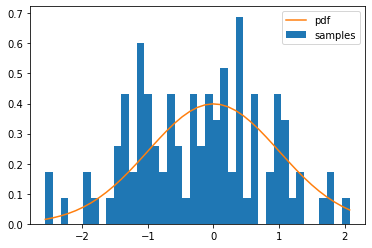

In [3]:
normal_dist(num_samples = 100)

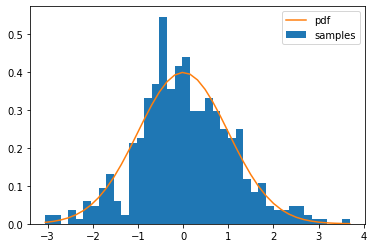

In [4]:
normal_dist(num_samples = 500)

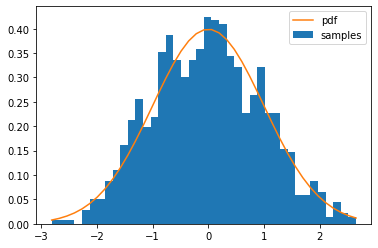

In [5]:
normal_dist(num_samples = 1000)

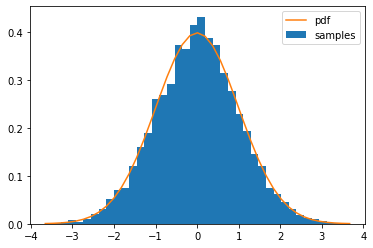

In [6]:
normal_dist(num_samples = 10000)

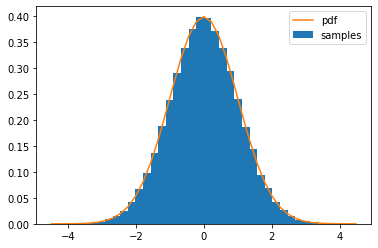

In [7]:
normal_dist(num_samples = 100000)

**2. Draw 100 samples from bi-variate Normal distribution. Repeat experiment 1.**

In [8]:
def normal_bi_variate_dist(mu = np.array([0,0]), 
                cov = np.array([[1, 0], [0, 1]]), 
                num_samples = 1000):
    
    '''
        parameters:
            mu -> mean matrix
            cov -> covarience matrix 
            num_samples -> number of samples we want to draw
            
        work: 
            plots histogram of samples and PDF of needed distribution (in 3D)
    '''
    
    # x, y -> variables of bivariate normal dist
    x, y = np.random.multivariate_normal(mu, cov, num_samples).T
    
    # 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    # Height -> Height of bar (in our case, frequency)
    print(f'Histogram of {num_samples} samples')
    Height, xedges, yedges = np.histogram2d(x, y,bins=(np.linspace(-5,5,30), np.linspace(-5,5,30)) )
    
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()

    ax.bar3d(xpos, ypos, 0, 1, 1, Height.ravel(), zsort='average')
    plt.show()
    
    # plotting the distribution
    print('Top view of bi-variate normal dist')
    plt.plot(x, y, 'x')
    plt.axis('equal')
    plt.show()

Histogram of 100 samples


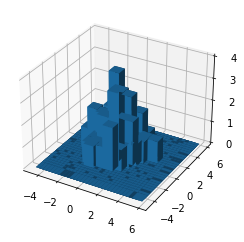

Top view of bi-variate normal dist


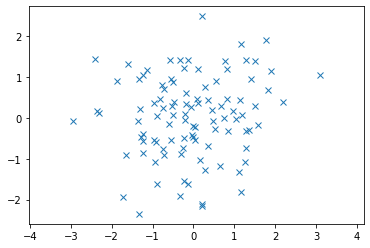

In [9]:
normal_bi_variate_dist(num_samples=100)

Histogram of 1000 samples


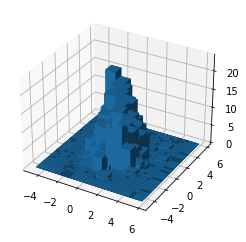

Top view of bi-variate normal dist


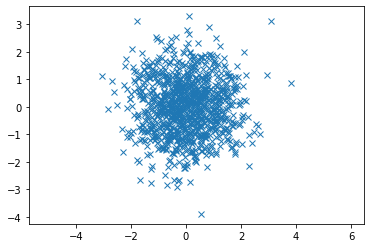

In [10]:
normal_bi_variate_dist(num_samples=1000)

Histogram of 10000 samples


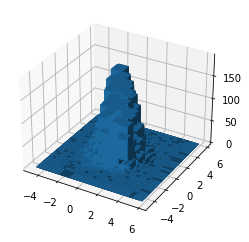

Top view of bi-variate normal dist


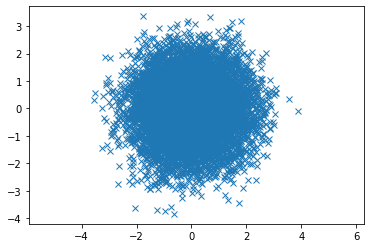

In [12]:
normal_bi_variate_dist(num_samples=10000)

Histogram of 100000 samples


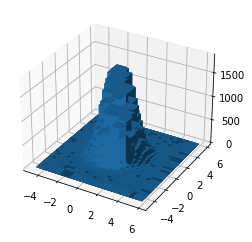

Top view of bi-variate normal dist


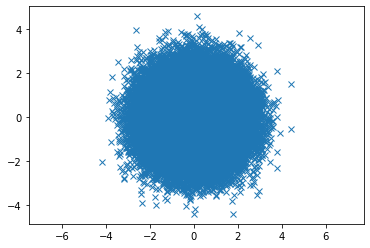

In [12]:
normal_bi_variate_dist(num_samples=100000)

**3. Do following**
     
     1. Implement central limit theorem.
     2. Draw 12 samples from Uni[0,1] as a sample population and perform CLT. Observe the distribution of sample means.

In [13]:
# range for uniform distribution
a,b = 0,1

# number of samples
n = 12

# mean and standard deviation
mu = (a+b)/2
sigma = np.sqrt(((b-a)**2)/12)

# each has n samples
uniform_dist = np.random.uniform(a,b,(10000,n))

# CLT 
normal_dist = (np.array([sum(pt) for pt in uniform_dist]) - n*mu) / (np.sqrt(n)*sigma)

# mean and varience of normal distribution
print(f'Mean: {np.mean(normal_dist)}')
print(f'Varience: {np.var(normal_dist)}')

Mean: -0.01597369022133822
Varience: 0.9858009983290882


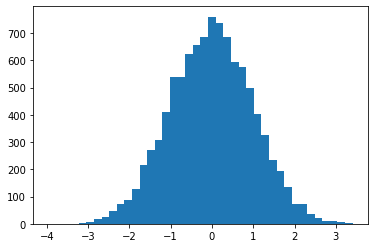

In [14]:
# plotting the histogram of normal dist
plt.hist(normal_dist,bins = 40)
plt.show()

**4. Use Box-Muller method to achieve Normal distribution.**

In [15]:
# range for distribution 
a,b = 0,1

# number of samples
n = 1000

# Generate 1000 U1 and U2, which are Uniform(0, 1)
uni1 = np.random.uniform(a,b,n)
uni2 = np.random.uniform(a,b,n)

# Uniform dists -> Normal dis using Box-Muller method
norm1 = np.sqrt((-2) * np.log(uni1)) * np.cos( 2 * np.pi * uni2)
norm2 = np.sqrt((-2) * np.log(uni1)) * np.sin( 2 * np.pi * uni2)

In [16]:
pd.DataFrame(
    {
        'mean':[np.mean(norm1), np.mean(norm2)], 
        'varience':[np.var(norm1), np.var(norm2)]
    }, index = ['normal dist - 1', 'normal dist - 2']
)

,mean,varience
normal dist - 1,0.024085,1.058734
normal dist - 2,-0.026601,1.054067


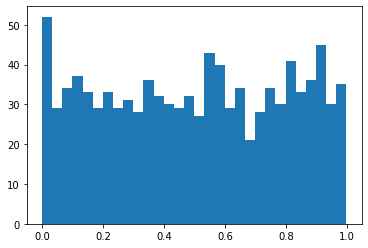

In [17]:
#histogram of uni1
plt.hist(uni1,bins = 30)
plt.show()

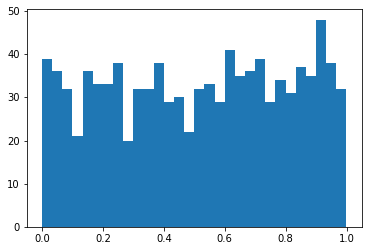

In [18]:
#histogram of uni2
plt.hist(uni2,bins = 30)
plt.show()

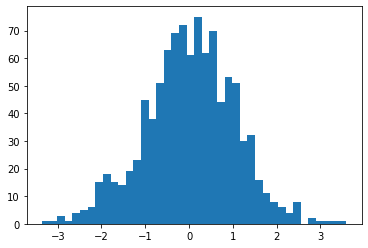

In [19]:
#ploting histogram for norm1
plt.hist(norm1,bins = 40)
plt.show()

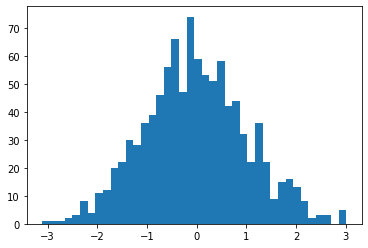

In [20]:
#ploting histogram for norm2
plt.hist(norm2,bins = 40)
plt.show()